In [19]:
####1. Build and evaluate the model by using additional one feature which has high feature next to RM and LSTV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [20]:
def featureNormalize(x):
    mu = np.mean(x, axis = 0)
    sigma = np.std(x, ddof = 1, axis = 0)
    x_norm = (x-mu) / sigma
    return x_norm, mu, sigma

(253, 3)
(253, 3)


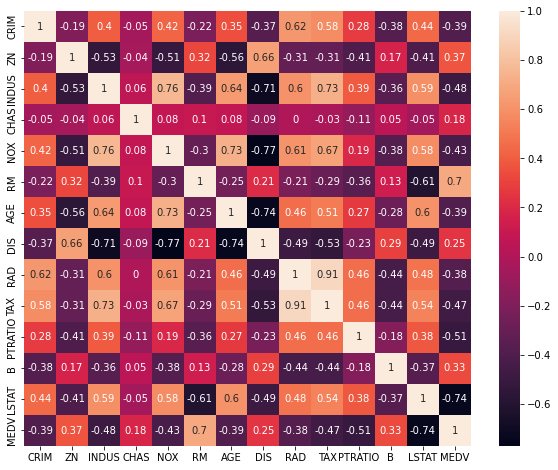

In [21]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("HousingDataCSV/HousingData.csv")

correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

X = data[['LSTAT', 'RM', 'PTRATIO']]
Y = data['MEDV']

X, mu, sigma = featureNormalize(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 5)

print(X_train.shape)
print(X_test.shape)

In [10]:
#2.Fit a polynomial regression model to the training data.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures()
X_train_ = poly.fit_transform(X_train.fillna(X_train.mean()))
X_test_ = poly.fit_transform(X_test.fillna(X_test.mean()))

poly_model = LinearRegression()
poly_model.fit(X_train_, Y_train)

lin_model = LinearRegression()
lin_model.fit(X_train.fillna(X_train.mean()), Y_train)
y_predict_lin = lin_model.predict(X_test.fillna(X_test.mean()))

In [11]:
#3.Predict the labels for the corresponding test data.
y_predict_poly = poly_model.predict(X_test_)

In [23]:
#4.Evaluate and generate the model parameters.
rmse_poly = np.sqrt(mean_squared_error(Y_test, y_predict_poly))
r2_poly = r2_score(Y_test, y_predict_poly)

rmse_lin = np.sqrt(mean_squared_error(Y_test, y_predict_lin))
r2_lin = r2_score(Y_test, y_predict_lin)

print("The model performance for the testing set \n ...")

print("  RMSE\n     polynomial: {0} \n     linear: {1} \n".format(rmse_poly, rmse_lin))
print("  r2 score\n     polynomial: {0} \n     linear: {1}".format(r2_poly, r2_lin))

The model performance for the testing set 
 ...
  RMSE
     polynomial: 4.583019805896268 
     linear: 5.541431927781147 

  r2 score
     polynomial: 0.7491780246537667 
     linear: 0.6333040436651685


In [ ]:
#5.Out of these predictors used in this assignment, which would you choose as a final model for the boston housing?
#Polynomial regression model performs good choice for the prediction problem. 
#So, i choose POLYNOMIAL REGRESSION MODEL